# Download this directory!
[Download Spatial Data needed for this Exercise](https://www.dropbox.com/sh/dzc4b5hsn0dc9vf/AABrX5NoR6W-gakT3Wbdmxo9a?dl=1 "Download")

# Point to where you have extracted the data below

In [3]:
DL_dir='/home/rick/Downloads/SpatialData' #change this to the location of the download

In [4]:
% matplotlib inline
import geopandas as gpd

In [6]:
# load into GeoDataFrame directly from shapefile
lakes = gpd.GeoDataFrame.from_file("{}/NHDPlus16/NHDWaterbodies.shp".format(DL_dir))
print lakes.crs  #find the coordinate reference system

{'init': u'epsg:4269'}


In [7]:
# attribute table
lakes.head()

,AREASQKM,COMID,ELEVATION,FCODE,FDATE,FTYPE,GNIS_ID,GNIS_NAME,REACHCODE,RESOLUTION,SHAPE_AREA,SHAPE_LENG,VPU,geometry
0,0.079,4562850,0.0,39004,1999-06-22,LakePond,None,None,16010202001481,Medium,0.000009,0.019938,16,"POLYGON ((-111.855203003485 41.90411666828982,..."
1,0.102,663806,0.0,39004,1999-06-22,LakePond,1446649,Tony Grove Lake,16010203000737,Medium,0.000011,0.015252,16,POLYGON ((-111.6456740038103 41.89611300163557...
2,0.036,663946,0.0,39004,1999-06-22,LakePond,None,None,16010203000755,Medium,0.000004,0.011745,16,POLYGON ((-111.7176358036986 41.75337126852378...
3,1.044,663954,1343.0,39010,1999-06-22,LakePond,None,None,16010203000753,Medium,0.000113,0.224490,16,"POLYGON ((-111.9423262033498 41.7297770685604,..."
4,0.037,663956,1343.0,39010,1999-06-22,LakePond,None,None,16010203000746,Medium,0.000004,0.010551,16,POLYGON ((-111.9461004700106 41.74514726853653...


In [8]:
print lakes.FTYPE[0] # returns first element in the series
print type(lakes.FTYPE)

LakePond
<class 'pandas.core.series.Series'>


In [9]:
print lakes.dtypes

AREASQKM      float64
COMID           int64
ELEVATION     float64
FCODE           int64
FDATE          object
FTYPE          object
GNIS_ID        object
GNIS_NAME      object
REACHCODE      object
RESOLUTION     object
SHAPE_AREA    float64
SHAPE_LENG    float64
VPU            object
geometry       object
dtype: object


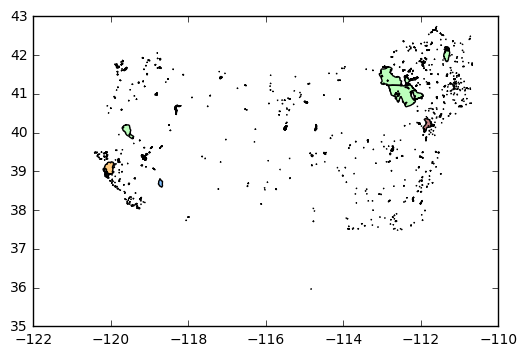

In [10]:
lakes.plot()  #Visualize

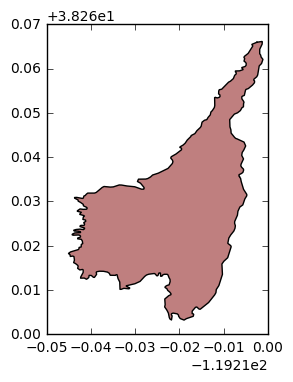

In [11]:
lake = lakes.ix[lakes.COMID==8914219]
lake.plot()

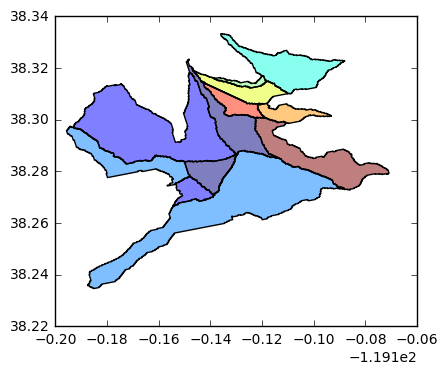

In [16]:
cats = gpd.GeoDataFrame.from_file("{}/NHDPlus16/NHDCatchment.shp".format(DL_dir))
basin = cats.ix[cats.FEATUREID.isin(range(8915961,8915984,2))]
basin.plot()

In [13]:
lakes.loc[2]

AREASQKM                                                  0.036
COMID                                                    663946
ELEVATION                                                     0
FCODE                                                     39004
FDATE                                                1999-06-22
FTYPE                                                  LakePond
GNIS_ID                                                    None
GNIS_NAME                                                  None
REACHCODE                                        16010203000755
RESOLUTION                                               Medium
SHAPE_AREA                                          3.87963e-06
SHAPE_LENG                                             0.011745
VPU                                                          16
geometry      POLYGON ((-111.7176358036986 41.75337126852378...
Name: 2, dtype: object

In [18]:
def fn_test(x):
    keep = []
    for uid in range(x,8915984,2):
        keep.append(cats.ix[cats.FEATUREID==uid].index.values[0])
    return keep

In [20]:
lakes.loc?

In [19]:
lakes.loc[lakes['COMID'] == 936010061]
lakes.ix[lakes.COMID == 936010061]
lakes.ix[lakes.COMID.isin([936010061])]
lakes.query("COMID == 936010061")
cats.loc[fn_test(8915961)]

,AreaSqKM,FEATUREID,GRIDCODE,SOURCEFC,geometry
1990,3.6603,8915961,2025936,NHDFlowline,POLYGON ((-119.2100332136869 38.31006253095128...
1991,0.3078,8915963,2025937,NHDFlowline,(POLYGON ((-119.2383391985852 38.3159179750923...
1992,1.5777,8915965,2025938,NHDFlowline,(POLYGON ((-119.2464028871374 38.3187767704922...
1993,1.0917,8915967,2025939,NHDFlowline,POLYGON ((-119.1933267198956 38.30141805017557...
1994,1.0980,8915969,2025940,NHDFlowline,(POLYGON ((-119.2428765261233 38.3144913411076...
1995,4.2120,8915971,2025949,NHDFlowline,POLYGON ((-119.1881548168508 38.27317620486482...
1996,2.7828,8915973,2025950,NHDFlowline,(POLYGON ((-119.2141720162324 38.2852673276837...
1997,10.6200,8915975,2025951,NHDFlowline,POLYGON ((-119.2500303831345 38.28359383074866...
1998,2.7765,8915977,2025952,NHDFlowline,POLYGON ((-119.2536445105015 38.27489607457483...
1987,1.5111,8915979,2025933,NHDFlowline,POLYGON ((-119.2385331509628 38.27119161007843...


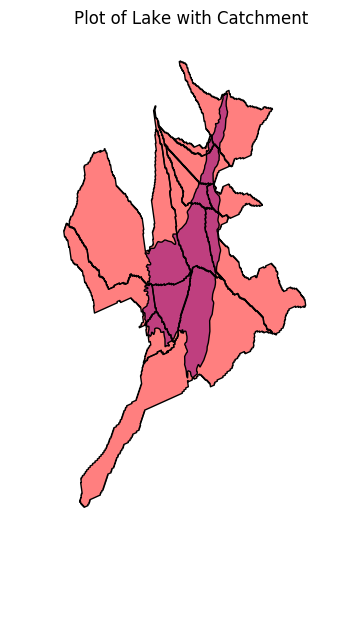

In [21]:
import matplotlib.pyplot as plt
#plt.style.use("default")
fig, ax = plt.subplots(1, figsize=(3.5,7))
base = lake.plot(ax=ax, color='blue')
basin.plot(ax=base, color='red') #
ax.axis('off')
ax.set_title("Plot of Lake with Catchment")

In [22]:
?gpd.GeoDataFrame.plot

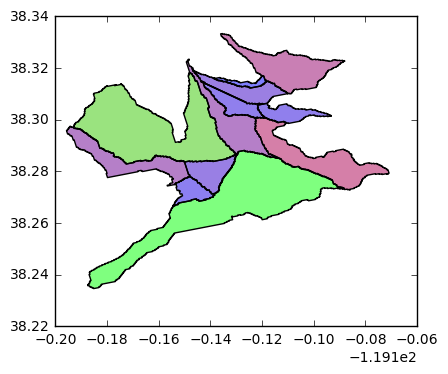

In [23]:
basin.plot(column='AreaSqKM', cmap="brg")

In [24]:
lake.to_json()

'{"type": "FeatureCollection", "features": [{"geometry": {"type": "Polygon", "coordinates": [[[-119.21250939206504, 38.32593747384385], [-119.21134779206682, 38.32612140717691], [-119.21128959206692, 38.32605280717701], [-119.21131799206688, 38.32552647384449], [-119.21186839206604, 38.324359073846324], [-119.21186719206605, 38.323352407181176], [-119.21166352539967, 38.32305507384831], [-119.21154679206654, 38.32259760718239], [-119.21113952540048, 38.322071607183204], [-119.21145772540001, 38.32113327385133], [-119.21197992539919, 38.32060660718548], [-119.21232612539865, 38.31854700718867], [-119.21252879206497, 38.31815787385591], [-119.21316712539732, 38.31760820719012], [-119.21322492539724, 38.317379273857114], [-119.21302132539756, 38.31719647385739], [-119.21304992539751, 38.316807473858034], [-119.21348479206353, 38.31628087385883], [-119.21444219206205, 38.31547927386009], [-119.21496492539455, 38.315295807193706], [-119.21508079206103, 38.315089807194], [-119.21534072539396

In [ ]:
lakes.to_crs({'init' :'epsg:4326'}).to_file("{}/lakes.json",driver="GeoJSON")

In [ ]:
import sys
import pandas as pd
from StreamCat_functions import findUpstreamNpy
assc8dArrays = "{}/"format(DL_dir)
zone = '16'
lookup = pd.read_csv('%s/lookupCOMS%s.csv' % (DL_dir,zone))

In [ ]:
findUpstreamNpy.func_code
import os
os.getcwd()

In [ ]:
lks = gpd.GeoDataFrame()
bsn = gpd.GeoDataFrame()
miss = gpd.GeoDataFrame()

for idx, row in lookup.iterrows():
    lake = lakes.ix[lakes.COMID == row.wbCOMID]
    catbas = findUpstreamNpy(zone, int(row.catCOMID), assc8dArrays)
    basin = cats.ix[cats.FEATUREID.isin(catbas)]
    try: 
        diffgeom = lake['geometry'].difference(basin.unary_union.buffer(0))
        pct = diffgeom.area / lake.area * 100
        if pct.values[0] > 50:
            lks = pd.concat([lks, lake])
            bsn = pd.concat([bsn, basin])
            miss = pd.concat([miss, gpd.GeoDataFrame(geometry=diffgeom)])
    except:
        print row.wbCOMID
        continue

In [ ]:
import folium

# Querying attributes

In [ ]:
lks.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\lks.json",driver="GeoJSON")
bsn.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\bsn.json",driver="GeoJSON")
miss.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\miss.json",driver="GeoJSON")

In [ ]:
center_point = lakes.unary_union.buffer(0).centroid
print center_point.x
print center_point.y

In [ ]:
import folium
map=folium.Map(location=[45.96040854768601, -117.47340297823],zoom_start=6,tiles="Stamen Terrain")
fg=folium.FeatureGroup(name="Lake Points")
for lat,lon,name in zip(lks['geometry'].centroid.map(lambda p: p.y),lks['geometry'].centroid.map(lambda p: p.x),lks['COMID']):
        fg.add_child(folium.Marker(location=[lat,lon],popup=name.map(lambda x: "NHD Waterbody COMID: %s" % x),
                                   icon=folium.Icon(icon_color='black')))
map.add_child(fg)
map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\lks.json'),
                name='NHD Lake',
                style_function=lambda x: {'fillColor':'blue', 'fill_opacity': 0.2, 'color':'black'}))
map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\bsn.json'),
                name='Catchment Basin',
                style_function=lambda x: {'fillColor':'grey', 
                          'fill_opacity': 0.47,}))
map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\miss.json'),
                name='Missed Area',
                style_function=lambda x: {'fillColor':'red', 'fill_opacity': 0.2, 'color':'none'}))
map.add_child(folium.LayerControl())
map.save(outfile=r'C:\Users\Rdebbout\Plot2Shps\lakesPoint.html')

In [ ]:
for lat,lon,name in zip(lks['geometry'].centroid.map(lambda p: p.y),lks['geometry'].centroid.map(lambda p: p.x),lks['COMID']):
    print "Lat: {} \nLon: {} \nCOMID: {}".format(lat,lon,name)

In [ ]:
lks2 = gpd.GeoDataFrame()
bsn2 = gpd.GeoDataFrame()
miss2 = gpd.GeoDataFrame()
for zone in inputs:
    hr = inputs[zone]
    lakes = lksnet.ix[lksnet.VPU == zone]  
    cats = gpd.GeoDataFrame.from_file('%s/NHDPlus%s/NHDPlus%s/NHDPlusCatchment/Catchment.shp' % (NHD_dir,hr, zone))   
    lookup = pd.read_csv('D:/Projects/lakesAnalysis/On_Network_LakeCOMs/LakeCOMs%s.csv' % zone)
    for idx, row in lookup.iterrows():
        lake = lakes.ix[lakes.COMID == row.wbCOMID]
        catbas = findUpstreamNpy(zone, int(row.catCOMID), catnumps)
        basin = cats.ix[cats.FEATUREID.isin(catbas)]
        try: 
            diffgeom = lake['geometry'].difference(basin.unary_union.buffer(0))
            pct = diffgeom.area / lake.area * 100
            if pct.values[0] > 50:
                lks2 = pd.concat([lks2, lake])
                bsn2 = pd.concat([bsn2, basin])
                miss2 = pd.concat([miss2, gpd.GeoDataFrame(geometry=diffgeom)])
        except:
            print row.wbCOMID
            continue

In [ ]:
% timeit
lks2.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\lks3.json",driver="GeoJSON")
bsn2.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\bsn3.json",driver="GeoJSON")
miss2.to_crs({'init' :'epsg:4326'}).to_file(r"C:\Users\Rdebbout\Plot2Shps\miss3.json",driver="GeoJSON")

In [ ]:
map=folium.Map(location=[45.96040854768601, -117.47340297823],zoom_start=6,tiles="Stamen Terrain")

fg=folium.FeatureGroup(name="Lake Points")
for lat,lon,name in zip(lakes['geometry'].centroid.map(lambda p: p.y),lakes['geometry'].centroid.map(lambda p: p.x),lakes['COMID']):
        fg.add_child(folium.Marker(location=[lat,lon],popup='NHD Waterbody COMID: %s' % name,
                                   icon=folium.Icon(icon_color='white', prefix='fa',icon='warning')))
map.add_child(fg)

map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\lks.json'),
name='NHD Lake',
style_function=lambda x: {'fillColor':'blue', 'fill_opacity': 0.4, 'color':'#5bc0de'}
))
map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\bsn.json'),
name='Catchment Basin',
style_function=lambda x: {'fillColor':'grey', 
                          'fill_opacity': 0.3, 
                          'color':'white'}
))
map.add_child(folium.GeoJson(data=open(r'C:\Users\Rdebbout\Plot2Shps\miss.json'),
name='Missed Area',
style_function=lambda x: {'fillColor':'red', 'fill_opacity': 0.2, 'color':'none'}
))
map.add_child(folium.LayerControl())
map.save(outfile=r'C:\Users\Rdebbout\Plot2Shps\lakesPoint.html')

In [ ]:
def color(vpu):
    if vpu in ['09','16','08','03N']:
        col='#d9534f'
    elif vpu in ['10U','05','13','03S']:
        col='#f9f9f9'
    elif vpu in ['14','07','02','12']:
        col='#5bc0de'
    elif vpu in ['17','10L','04','06','15']:
        col='#5cb85c'
    elif vpu in ['18','11','01','03W']:
        col='#428bca'
    return col

In [ ]:
extent = lks2.unary_union.bounds
lat_Center = (extent[1] + extent[3]) / 2
lon_Center = (extent[0] + extent[2]) / 2